### A few initial libraries ###

In [1]:
import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ
from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeBogota
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo
from gate_variants.cx_variants import CX_Variant_Gate 
from orientation_map import orientation_map_gen

In [2]:
qiskit.__qiskit_version__

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### Load device and the device configuration object ###

In [3]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q-ornl')
# device = FakeMumbai()

# backend_prop = device.properties()

In [4]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider

In [5]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [6]:
from level3_context import _parse_transpile_args
from level3_context_pulse import level_3_pass_manager, level_3_context_pulse_pass_manager, level_3_pulse_pass_manager

In [7]:
#test three intersection
t5 = QuantumCircuit(5, 5)

t5.cx(1,2)
t5.cx(2,3)
t5.rz(np.pi/3, 3)
t5.cx(2,3)
t5.cx(1,2)

t5.cx(2,3)
t5.cx(3,4)
t5.rz(np.pi/3, 4)
t5.cx(3,4)
t5.cx(2,3)

t5.cx(0,1)
t5.cx(1,2)
t5.rz(np.pi/3, 2)
t5.cx(1,2)
t5.cx(0,1)
# t5.ccx(0,1,2)
# t5.ccx(2,3,4)




#t5.measure(list(range(5)), list(range(5)))

In [8]:
t5.draw()

»
q_0: ─────────────────────────────────■─────────────────────────────────»
                                    ┌─┴─┐                               »
q_1: ──■─────────────────────────■──┤ X ├────────────────────────────■──»
     ┌─┴─┐                     ┌─┴─┐└───┘                          ┌─┴─┐»
q_2: ┤ X ├──■───────────────■──┤ X ├──■─────────────────────────■──┤ X ├»
     └───┘┌─┴─┐┌─────────┐┌─┴─┐└───┘┌─┴─┐                     ┌─┴─┐└───┘»
q_3: ─────┤ X ├┤ Rz(π/3) ├┤ X ├─────┤ X ├──■───────────────■──┤ X ├─────»
          └───┘└─────────┘└───┘     └───┘┌─┴─┐┌─────────┐┌─┴─┐└───┘     »
q_4: ────────────────────────────────────┤ X ├┤ Rz(π/3) ├┤ X ├──────────»
                                         └───┘└─────────┘└───┘          »
c: 5/═══════════════════════════════════════════════════════════════════»
                                                                        »
«                          
«q_0: ──────────────────■──
«                     ┌─┴─┐
«q_1: ─────────────■──┤ X ├
«     ┌─────────┐┌─┴─┐└───┘
«q_2: ┤ Rz(π/3) ├┤ X ├─────
«     └─────────┘└───┘     
«q_3: ─────────────────────
«                          
«q_4: ─────────────────────
«                          
«c: 5/═════════════════════
«

In [9]:
backend = provider.get_backend('ibmq_jakarta')

In [10]:
backend

<IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q-ornl', group='anl', project='csc430')>

In [11]:
backend_prop = backend.properties()

In [12]:
orientation_map = orientation_map_gen(backend)

In [13]:
transpile_args = _parse_transpile_args([t5], backend, seed_transpiler = 0, orientation_map = orientation_map)

In [14]:
pass_manager_config = transpile_args[0]['pass_manager_config']

In [15]:
print(pass_manager_config.orientation_map)

{(0, 1): 'f', (1, 0): 'b', (1, 2): 'b', (1, 3): 'f', (2, 1): 'f', (3, 1): 'b', (3, 5): 'f', (4, 5): 'b', (5, 3): 'b', (5, 4): 'f', (5, 6): 'b', (6, 5): 'f'}


In [16]:
pm_context = level_3_pulse_pass_manager(pass_manager_config)

layout_method:  dense
routing method:  basic


In [17]:
pm_orign = level_3_pass_manager(pass_manager_config)

layout_method:  dense
routing method:  basic


In [18]:
t_circ = pm_context.run(t5)

Layout({
1: Qubit(QuantumRegister(5, 'q'), 1),
3: Qubit(QuantumRegister(5, 'q'), 2),
5: Qubit(QuantumRegister(5, 'q'), 3),
2: Qubit(QuantumRegister(5, 'q'), 0),
6: Qubit(QuantumRegister(5, 'q'), 4)
})
intersect [Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(7, 'q'), 3)]
intersect [Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(7, 'q'), 2), Qubit(QuantumRegister(7, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(7, 'q'), 1)]
intersect [Qubit(QuantumRegister(7, 'q'), 3), Qubit(QuantumRegister(7, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(7, 'q'), 5)]
intersect [Qubit(QuantumRegister(7, 'q'), 5), Qubit(QuantumRegister(7, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(7, 'q'), 1), Qubit(QuantumRegister(7, 'q'),

In [19]:
t_orign = pm_orign.run(t5)

Layout({
1: Qubit(QuantumRegister(5, 'q'), 1),
3: Qubit(QuantumRegister(5, 'q'), 2),
5: Qubit(QuantumRegister(5, 'q'), 3),
2: Qubit(QuantumRegister(5, 'q'), 0),
6: Qubit(QuantumRegister(5, 'q'), 4)
})


In [20]:
t_circ.count_ops()

OrderedDict([('rz', 19), ('ry', 14), ('rx', 14), ('acecr_pm', 12)])

In [21]:
t_circ.draw()

»
ancilla_0 -> 0 ──────────────────────────────────────────────────────────────»
               ┌───────────┐ ┌───────┐   ┌──────────┐┌─────────┐  ┌───────┐  »
      q_1 -> 1 ┤0          ├─┤ Ry(π) ├───┤ Rz(-π/2) ├┤ Rz(π/2) ├──┤ Ry(π) ├──»
               │           │ └───────┘   └──────────┘└─────────┘  └───────┘  »
      q_0 -> 2 ┤  Acecr_pm ├─────────────────────────────────────────────────»
               │           │┌──────────┐┌───────────┐ ┌───────┐  ┌──────────┐»
      q_2 -> 3 ┤1          ├┤ Rx(-π/2) ├┤0          ├─┤ Ry(π) ├──┤ Rz(-π/2) ├»
               └───────────┘└──────────┘│           │ └───────┘  └──────────┘»
ancilla_1 -> 4 ─────────────────────────┤  Acecr_pm ├────────────────────────»
                                        │           │┌──────────┐┌─────────┐ »
      q_3 -> 5 ─────────────────────────┤1          ├┤ Rx(-π/2) ├┤ Rz(π/3) ├─»
                ┌─────────┐ ┌─────────┐ └───────────┘└──────────┘└─────────┘ »
      q_4 -> 6 ─┤ Rz(π/2) ├─┤ Rx(π/2) ├──────────────────────────────────────»
                └─────────┘ └─────────┘                                      »
          c: 5/══════════════════════════════════════════════════════════════»
                                                                             »
«                                                                        »
«ancilla_0 -> 0 ─────────────────────────────────────────────────────────»
«                                                           ┌───────────┐»
«      q_1 -> 1 ────────────────────────────────────────────┤0          ├»
«                                                           │           │»
«      q_0 -> 2 ────────────────────────────────────────────┤  Acecr_pm ├»
«               ┌─────────┐┌───────┐┌───────────┐┌─────────┐│           │»
«      q_2 -> 3 ┤ Rz(π/2) ├┤ Ry(π) ├┤0          ├┤ Rx(π/2) ├┤1          ├»
«               └─────────┘└───────┘│           │└─────────┘└───────────┘»
«ancilla_1 -> 4 ────────────────────┤  Acecr_pm ├────────────────────────»
«               ┌─────────┐         │           │                        »
«      q_3 -> 5 ┤ Rx(π/2) ├─────────┤1          ├────────────────────────»
«               └─────────┘         └───────────┘                        »
«      q_4 -> 6 ─────────────────────────────────────────────────────────»
«                                                                        »
«          c: 5/═════════════════════════════════════════════════════════»
«                                                                        »
«                                                                            »
«ancilla_0 -> 0 ─────────────────────────────────────────────────────────────»
«               ┌───────────┐┌──────────┐                                    »
«      q_1 -> 1 ┤1          ├┤ Rx(-π/2) ├────────────────────────────────────»
«               │  Acecr_pm │└┬───────┬─┘┌──────────┐┌─────────┐  ┌───────┐  »
«      q_0 -> 2 ┤0          ├─┤ Ry(π) ├──┤ Rz(-π/2) ├┤ Rz(π/2) ├──┤ Ry(π) ├──»
«               ├───────────┤ ├───────┤  ├──────────┤├─────────┤  ├───────┤  »
«      q_2 -> 3 ┤0          ├─┤ Ry(π) ├──┤ Rz(-π/2) ├┤ Rz(π/2) ├──┤ Ry(π) ├──»
«               │           │ └───────┘  └──────────┘└─────────┘  └───────┘  »
«ancilla_1 -> 4 ┤  Acecr_pm ├────────────────────────────────────────────────»
«               │           │┌──────────┐ ┌───────┐  ┌─────────┐┌───────────┐»
«      q_3 -> 5 ┤1          ├┤ Rx(-π/2) ├─┤ Rz(π) ├──┤ Ry(π/2) ├┤1          ├»
«               └───────────┘└──────────┘ └───────┘  └─────────┘│  Acecr_pm │»
«      q_4 -> 6 ────────────────────────────────────────────────┤0          ├»
«                                                               └───────────┘»
«          c: 5/═════════════════════════════════════════════════════════════»
«                                                                            »
«                                                                           »
«ancilla_0 -> 0 ──────────────────────

In [22]:
out = superstaq_provider.ibmq_compile(t_circ, target="ibmq_jakarta_qpu")

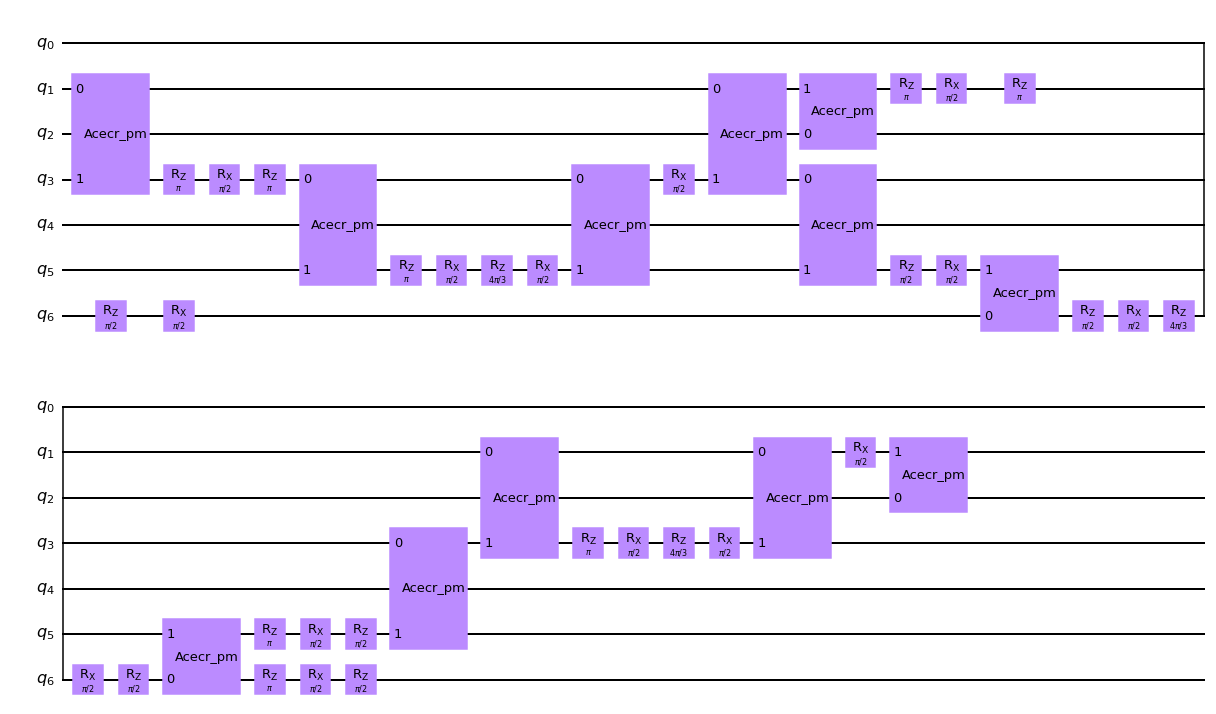

In [23]:
out.circuit.draw(output='mpl')

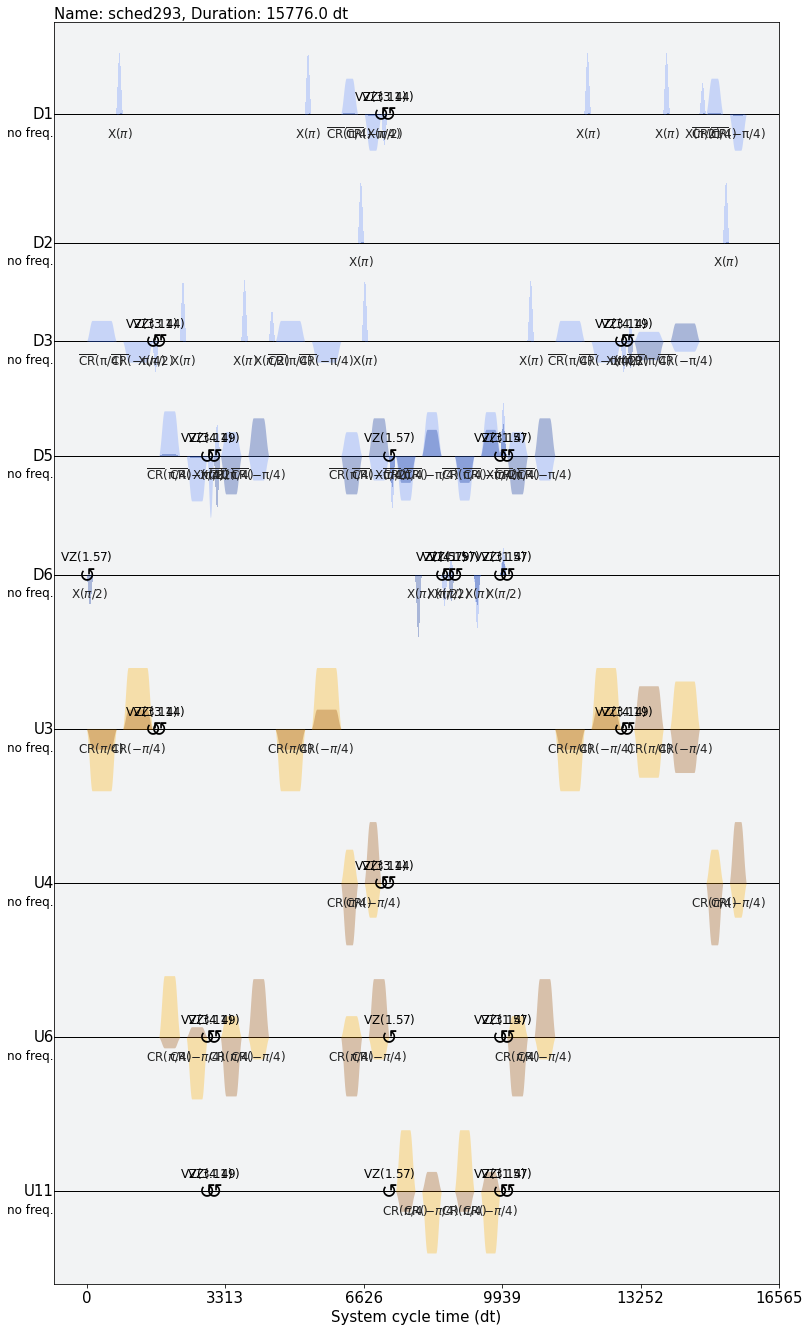

In [24]:
out.pulse_sequence.draw()

In [25]:
out.circuit.count_ops()

OrderedDict([('rz', 17), ('rx', 14), ('acecr_pm', 12)])

In [26]:
out2 = superstaq_provider.ibmq_compile(t_orign, target="ibmq_jakarta_qpu")

In [27]:
out2.circuit.count_ops()

OrderedDict([('rz', 23), ('rx', 15), ('acecr_pm', 12), ('x', 11)])

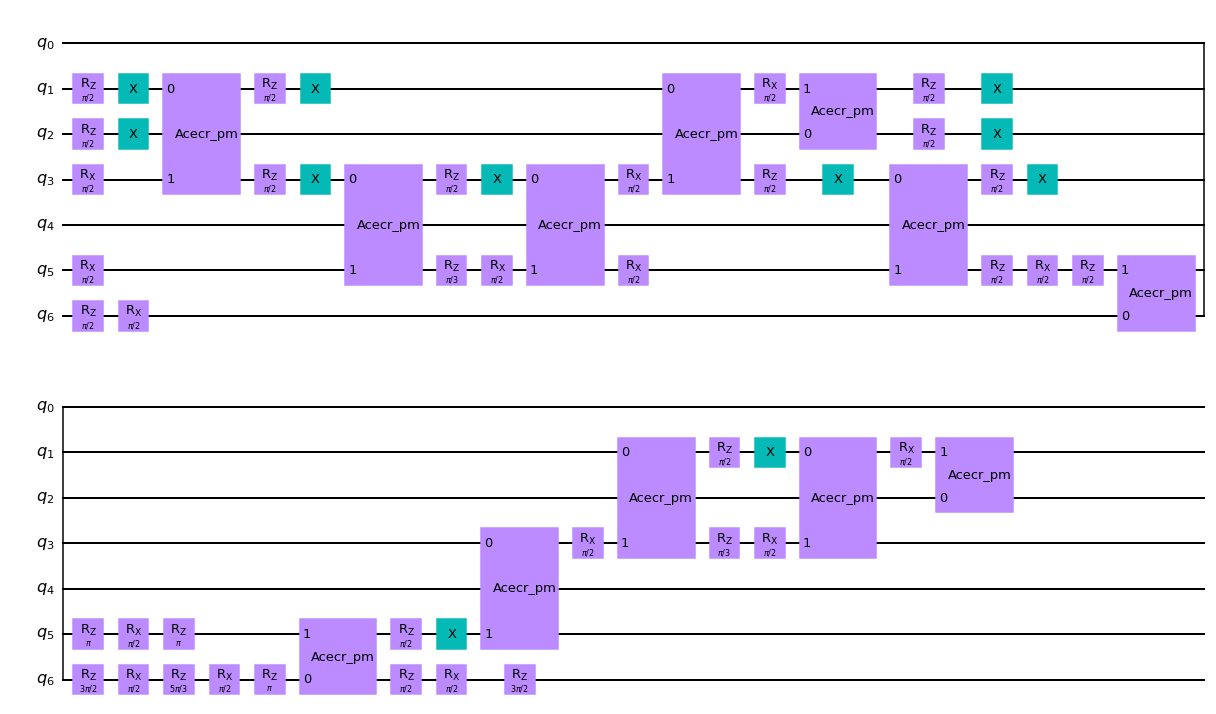

In [28]:
out2.circuit.draw(output='mpl')

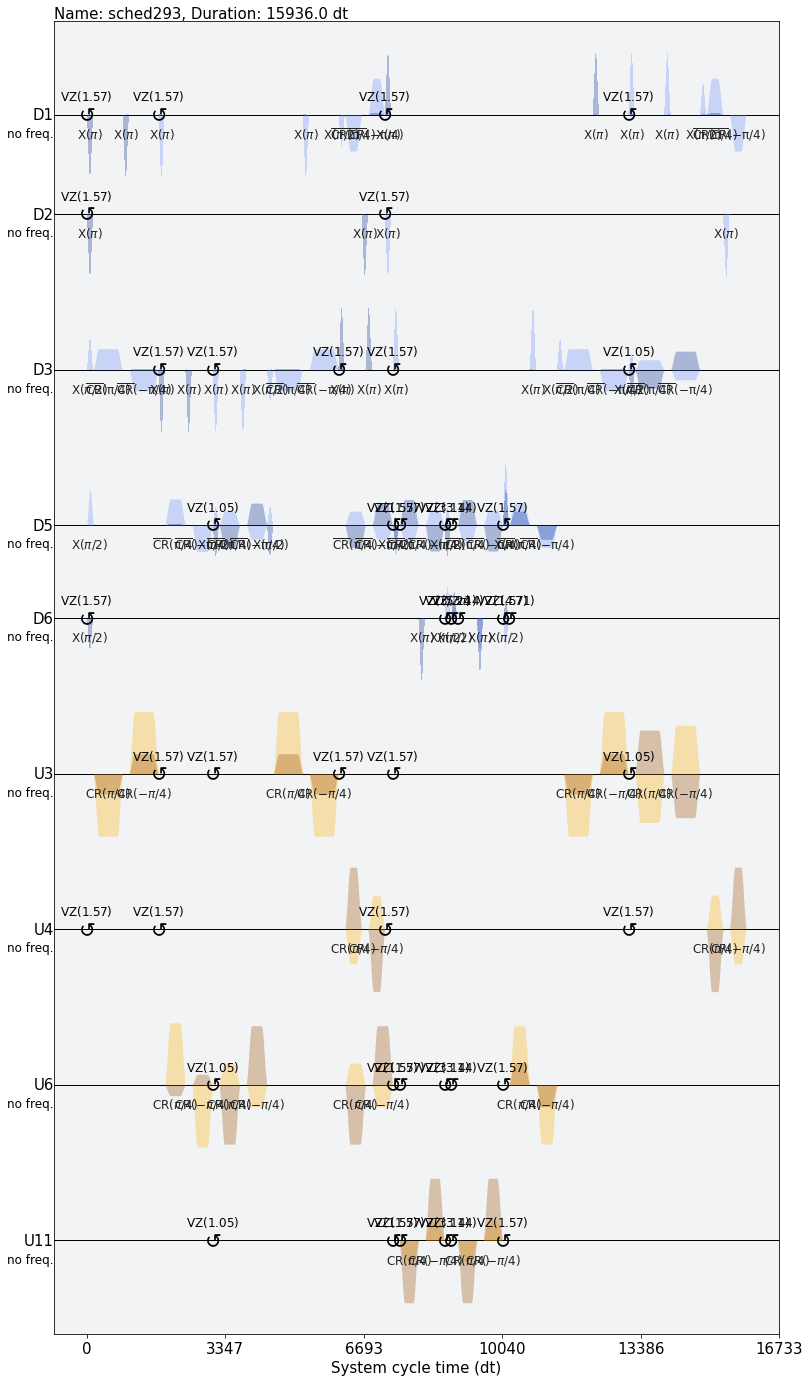

In [29]:
out2.pulse_sequence.draw()

In [30]:
t_orign = transpile(t5, backend, optimization_level = 3)

In [31]:
t_orign_schedule = schedule(
            circuits=t_orign,
            backend=backend,
            inst_map=None,
            meas_map=None,
            method=None,
        )

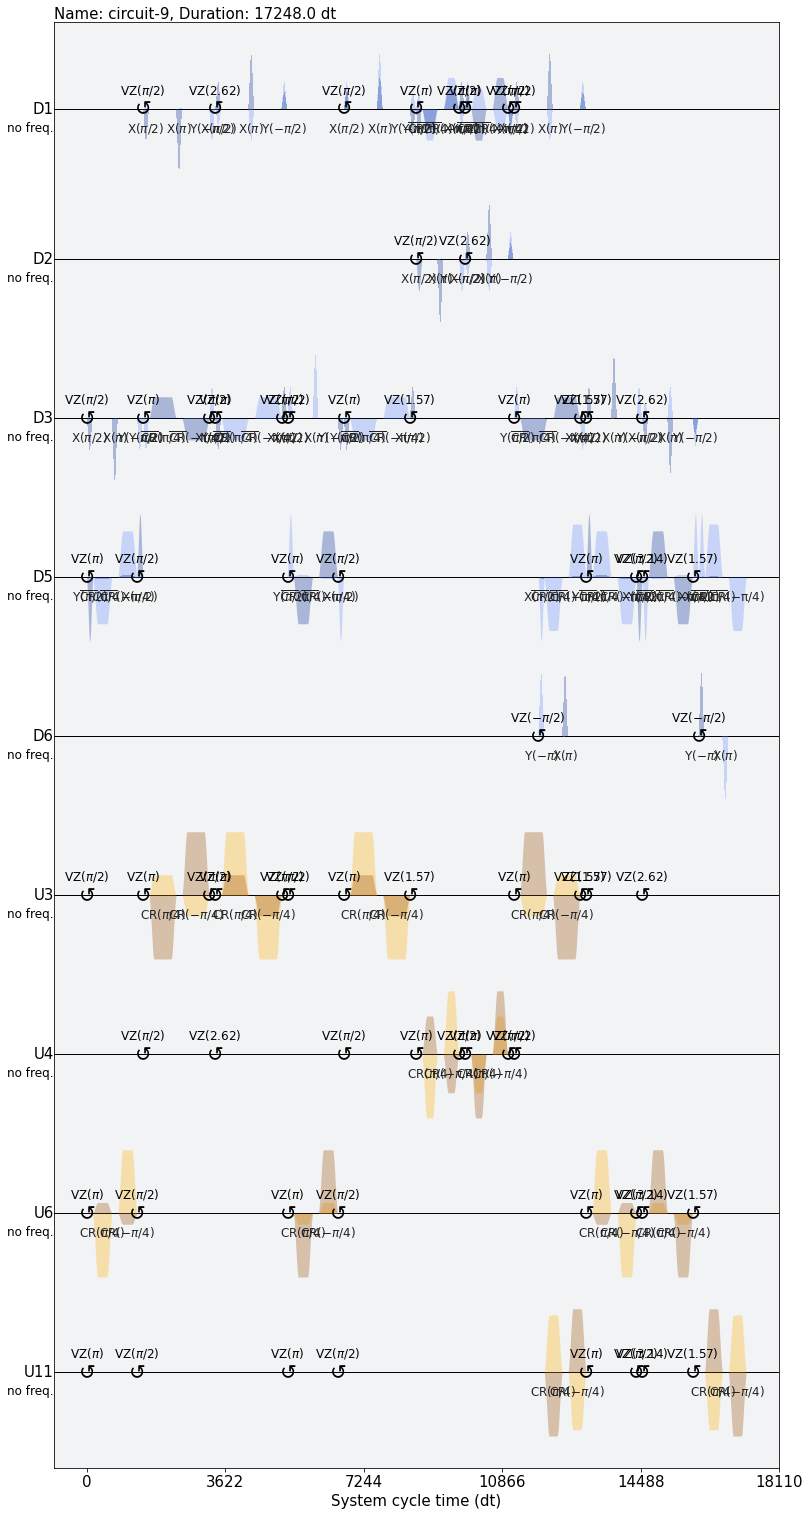

In [32]:
t_orign_schedule.draw()

In [33]:
#19

In [34]:
t_orign_schedule.children[5]

(6720,
 Schedule((0, ShiftPhase(-1.5707963267948966, DriveChannel(1))), (0, ShiftPhase(-3.141592653589793, DriveChannel(3))), (0, ShiftPhase(-1.5707963267948966, ControlChannel(0))), (0, ShiftPhase(-3.141592653589793, ControlChannel(3))), (0, ShiftPhase(-1.5707963267948966, ControlChannel(4))), (0, ShiftPhase(-1.5707963267948966, ControlChannel(5))), (0, ShiftPhase(-3.141592653589793, ControlChannel(8))), (0, Play(Drag(duration=160, amp=(0.09591067193684848+0.0021073096550156454j), sigma=40, beta=-1.1595645032162354, name='X90p_d1'), DriveChannel(1), name='X90p_d1')), (0, Play(Drag(duration=160, amp=(0.00024429982647743544+0.09672086584553752j), sigma=40, beta=0.5292268605797695, name='Y90p_d3'), DriveChannel(3), name='Y90p_d3')), (160, Play(GaussianSquare(duration=704, amp=(0.06553461814337508-0.0017965272209132079j), sigma=64, width=448, name='CR90p_d3_u3'), DriveChannel(3), name='CR90p_d3_u3')), (160, Play(GaussianSquare(duration=704, amp=(-0.7591395560293808-0.2461181293735626j), s

In [35]:
help(t_orign_schedule)

Help on Schedule in module qiskit.pulse.schedule object:

class Schedule(builtins.object)
 |  Schedule(*schedules: Union[ForwardRef('Schedule'), qiskit.pulse.instructions.instruction.Instruction, Tuple[int, Union[ForwardRef('Schedule'), qiskit.pulse.instructions.instruction.Instruction]]], name: Union[str, NoneType] = None, metadata: Union[dict, NoneType] = None)
 |  
 |  A quantum program *schedule* with exact time constraints for its instructions, operating
 |  over all input signal *channels* and supporting special syntaxes for building.
 |  
 |  Pulse program representation for the original Qiskit Pulse model [1].
 |  Instructions are not allowed to overlap in time
 |  on the same channel. This overlap constraint is immediately
 |  evaluated when a new instruction is added to the ``Schedule`` object.
 |  
 |  It is necessary to specify the absolute start time and duration
 |  for each instruction so as to deterministically fix its execution time.
 |  
 |  The ``Schedule`` program s

In [36]:
t_orign_schedule.instructions

((0, ShiftPhase(-1.5707963267948966, DriveChannel(3))),
 (0, ShiftPhase(-3.141592653589793, DriveChannel(5))),
 (0, ShiftPhase(-3.141592653589793, ControlChannel(11))),
 (0, ShiftPhase(-1.5707963267948966, ControlChannel(3))),
 (0, ShiftPhase(-3.141592653589793, ControlChannel(6))),
 (0, ShiftPhase(-3.141592653589793, ControlChannel(7))),
 (0, ShiftPhase(-1.5707963267948966, ControlChannel(8))),
 (0,
  Play(Drag(duration=160, amp=(0.09672086584553752-0.0002442998264774194j), sigma=40, beta=0.5292268605797695, name='X90p_d3'), DriveChannel(3), name='X90p_d3')),
 (0,
  Play(Drag(duration=160, amp=(-0.0013155736420234713+0.09343255413184134j), sigma=40, beta=-0.8260101223075255, name='Y90p_d5'), DriveChannel(5), name='Y90p_d5')),
 (160,
  Play(GaussianSquare(duration=496, amp=(0.06823970936107211+0.0029056778790278004j), sigma=64, width=240, name='CR90p_d5_u6'), DriveChannel(5), name='CR90p_d5_u6')),
 (160,
  Play(GaussianSquare(duration=496, amp=(0.4793427847550843-0.08228725735534022j),

In [37]:
t_orign_schedule.instructions[4][-1].name